In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
df=sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
#checking data of all the columns
for i in df.columns:
    print(i,"---",df[i].unique())

survived --- [0 1]
pclass --- [3 1 2]
sex --- ['male' 'female']
age --- [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
sibsp --- [1 0 3 4 2 5 8]
parch --- [0 1 2 5 3 4 6]
fare --- [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     

In [3]:
#dropping irrelevant columns
l=["sex","embarked","adult_male","alive"]
df.drop(columns=l,inplace=True)

In [4]:
#checking percentage of nan values
for i in df.columns:
    print(i,"------",df[i].isnull().sum()*100/df.shape[0])

survived ------ 0.0
pclass ------ 0.0
age ------ 19.865319865319865
sibsp ------ 0.0
parch ------ 0.0
fare ------ 0.0
class ------ 0.0
who ------ 0.0
deck ------ 77.21661054994388
embark_town ------ 0.2244668911335578
alone ------ 0.0


In [5]:
#dropping columns with more than 70% nan values
for i in df.columns:
    if ((df[i].isnull().sum()*100)/df.shape[0])>=70:
        df.drop(columns=[i],inplace=True)

In [6]:
for i in df.columns:
    print(i,"------",df[i].isnull().sum()*100/df.shape[0])

survived ------ 0.0
pclass ------ 0.0
age ------ 19.865319865319865
sibsp ------ 0.0
parch ------ 0.0
fare ------ 0.0
class ------ 0.0
who ------ 0.0
embark_town ------ 0.2244668911335578
alone ------ 0.0


In [7]:
#for other columns first checking data type in order to fill them
l=["age","embark_town"]
for i in l:
    print(i,"---",df[(i)].dtypes)

age --- float64
embark_town --- object


C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

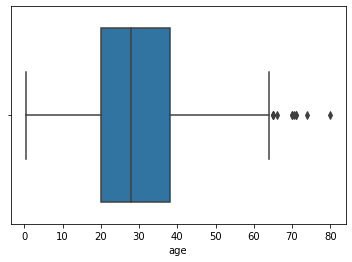

In [9]:
#checking outliers of age column, as there are, using median to fill its column
sns.boxplot(df["age"])

In [10]:
df["age"].fillna(df["age"].median(),inplace=True)
df["embark_town"].fillna(df["embark_town"].mode()[0],inplace=True) #object type, so mode to fill 
for i in df.columns:
    print(i,"-------",df[i].isnull().sum())

survived ------- 0
pclass ------- 0
age ------- 0
sibsp ------- 0
parch ------- 0
fare ------- 0
class ------- 0
who ------- 0
embark_town ------- 0
alone ------- 0
